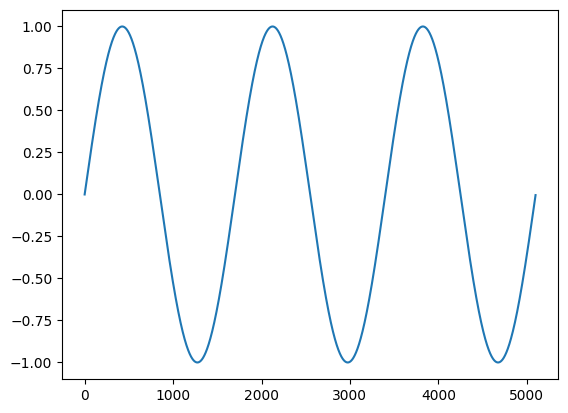

2550.0


/home/lena/.local/lib/python3.9/site-packages/numba/core/ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'interval' of function 'getfftcomp'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../../../../tmp/ipykernel_582524/2544986411.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


2549.9999999999995


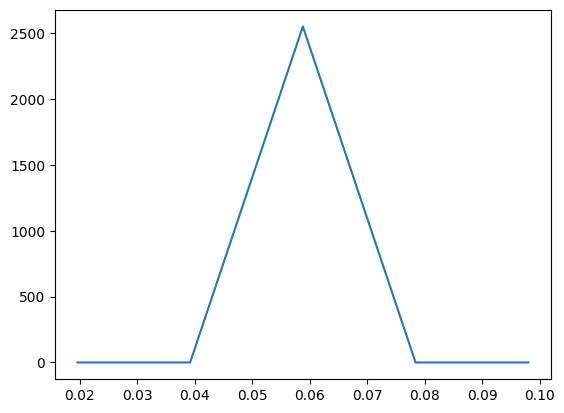

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, uint16

DT = 0.01
SAMPLE_RATE = 1./DT
PERIOD = 17.
DURATION = 3. * PERIOD
N = int(DURATION/DT)


testfunc = np.sin(2.*np.pi*np.arange(0., DURATION, DT)/PERIOD)
plt.plot(testfunc)
plt.show()

four_spec = np.abs(np.fft.fft(testfunc))[:int(N/2)]
freqs = np.fft.fftfreq(N, 1 / SAMPLE_RATE)[:int(N/2)]

k = getk(PERIOD, 0, N, DT)
print(four_spec[k])

fftcomp = getfftcomp(testfunc, PERIOD, [0,N], DT)
print(fftcomp)

plt.plot(freqs[k-2:k+3], np.abs(four_spec[k-2:k+3]))
plt.show()



In [23]:
@njit
def getfftcomp(X, target_period, interval, dt):
    res = 0.0
    T = interval[1] - interval[0]
    k = uint16(T * dt / target_period)
    for t in range(0, T):
        res += X[t] * np.exp(-2.0 * complex(0, 1) * np.pi * k * t / T)
    return np.abs(res)

def getk(target_period, int0, int1, dt):
    return np.round((int1-int0)*dt/target_period,1).astype(int)

In [44]:
four1 = np.fft.fft(testfunc)

In [45]:
four2 = getfftcomp(testfunc, N)

<font size="10">$$X_{k}=\sum_{n=0}^{N-1}x_{n}\cdot e^{-{\frac {2i \cdot \pi }{N}}kn}$$</font>

<font size="10">$$F=\int_{\kappa-\Delta k}^{\kappa + \Delta k} \sum_{n=0}^{N} x(t_n) \cdot e^{-2i\pi kn/N} ~dk$$
</font>